## [[DSC-2024](https://comp.ita.br/dsc/edicoes/2024/)] Develop a predictive model for the presence of hold(s) in commercial flights with origin and destination at the 12 main airports in Brazil

### Author: [Lucas Lima](https://www.linkedin.com/in/lucaslima25/)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys

from pathlib import Path
from datetime import datetime

In [2]:
sys.path.append(str(Path().cwd().parent))

from preprocessing import preprocessor

In [3]:
plt.rcParams["figure.dpi"] = 100

In [4]:
%reload_ext watermark
%watermark -a "xxx Team" --iversions

Author: xxx Team

numpy     : 1.23.5
pandas    : 1.5.3
matplotlib: 3.7.0
seaborn   : 0.13.2
sys       : 3.11.7 (main, Dec 15 2023, 18:12:31) [GCC 11.2.0]



### Preprocessamento dos Dados

In [5]:
data = pd.read_csv('../../data/base/public.csv', index_col='flightid')

In [6]:
raw_df = data[~data['espera'].isna()].copy()

In [7]:
to_cat = ["prev_troca_cabeceira", "troca_cabeceira_hora_anterior", "espera"]

In [8]:
raw_df[to_cat] = raw_df[to_cat].astype('category')

In [9]:
raw_df_prediction = data[data['espera'].isna()].copy()
raw_df_prediction.drop(['espera'], axis=1, inplace=True)

In [10]:
################ SOMENTE TESTES ####################
raw_df = raw_df[:1000]
raw_df_prediction = raw_df_prediction[:1000]

Started ImputeHandler: 10:15:38Z
Finished ImputeHandler: 10:15:39Z
Started MetarHandler: 10:15:39Z
Finished MetarHandler: 10:15:39Z
Started SatelliteImageHandler: 10:15:39Z


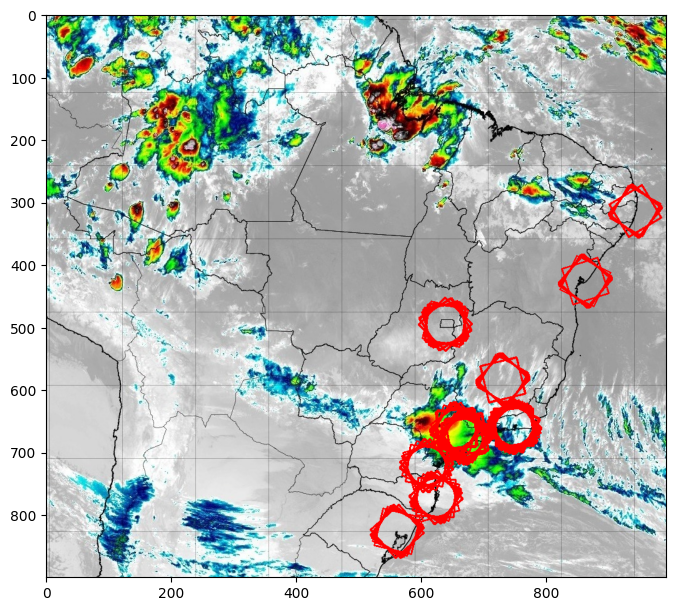

Finished SatelliteImageHandler: 10:15:53Z
Started DateHandler: 10:15:53Z
Finished DaterHandler: 10:15:53Z


In [11]:
df = preprocessor(
    raw_df,
    satImage_width = 60,
    satImage_outputWidth = 32,
    satImage_outputHeight = 32,
    satImage_printRoutes = True,
    satImage_printEachImage = False,
    date_holiday_near = 2,
    balancer_method='under',
    balancer_ratio=1,
    balancer_target='espera',
    balancer_categorical_features=[0, 1, 2, 3, 4, 5],
    apply_balancer = False,
    drop_outlier=False
)

In [12]:
df.to_csv(f"../../data/preprocessing/df_padding_60_drop_0.csv", index=False)

Started ImputeHandler: 10:15:53Z
Finished ImputeHandler: 10:15:53Z
Started MetarHandler: 10:15:53Z
Finished MetarHandler: 10:15:54Z
Started SatelliteImageHandler: 10:15:54Z


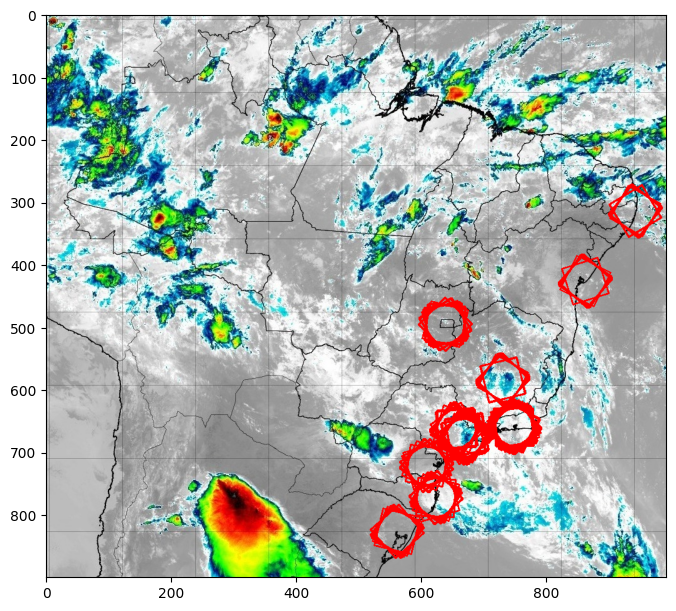

Finished SatelliteImageHandler: 10:16:04Z
Started DateHandler: 10:16:04Z
Finished DaterHandler: 10:16:04Z


In [13]:
df_prediction = preprocessor(
    raw_df_prediction,
    satImage_width = 60,
    satImage_outputWidth = 32,
    satImage_outputHeight = 32,
    satImage_printRoutes = True,
    satImage_printEachImage = False,
    date_holiday_near = 2,
    apply_balancer = False,
    drop_outlier=False
)

In [14]:
df_prediction.to_csv(f"../../data/preprocessing/df_prediction_padding_60_drop_0.csv", index=True)

In [16]:
correlation_matrix

,metar_CAVOK,metar_wind_direction,metar_wind_speed,metar_temperature,metar_dewpoint,metar_qnh,metar_visibility,metar_FEW_alt,metar_FEW_CB,metar_SCT_alt,...,metar_OVC_alt,distance,imageSatelite_red,imageSatelite_yellow,imageSatelite_green,imageSatelite_blue,hour,weekday,mounth,holiday_near
metar_CAVOK,1.000000,0.058196,-0.176359,-0.060584,-0.416709,0.220729,0.282123,-0.290251,-0.061838,-0.220456,...,-0.192888,-0.036745,0.027415,-0.035294,-0.181260,-0.303961,-0.066865,0.089231,NaN,NaN
metar_wind_direction,0.058196,1.000000,0.070866,0.019625,0.051335,-0.132018,0.263029,0.011064,-0.061597,0.106108,...,-0.038353,0.071503,-0.008904,-0.019189,-0.028375,0.036630,0.046906,0.019521,NaN,NaN
metar_wind_speed,-0.176359,0.070866,1.000000,0.446087,0.369635,-0.356062,0.154286,0.224147,0.009281,0.142634,...,0.004807,0.038768,0.072775,0.006277,-0.088775,-0.149464,0.302643,-0.270225,NaN,NaN
metar_temperature,-0.060584,0.019625,0.446087,1.000000,0.753665,-0.671897,0.208440,0.216855,-0.066192,0.277847,...,-0.243875,0.208657,-0.032520,-0.067734,-0.197611,-0.283125,0.286444,-0.151771,NaN,NaN
metar_dewpoint,-0.416709,0.051335,0.369635,0.753665,1.000000,-0.746184,-0.021441,0.196780,-0.010029,0.297658,...,-0.123711,0.177810,-0.010787,-0.021416,-0.084122,-0.095734,0.107966,-0.010666,NaN,NaN
metar_qnh,0.220729,-0.132018,-0.356062,-0.671897,-0.746184,1.000000,0.082879,-0.205917,0.041914,-0.207402,...,0.159567,-0.245113,0.047779,0.089122,0.124615,0.206604,-0.156204,-0.147669,NaN,NaN
metar_visibility,0.282123,0.263029,0.154286,0.208440,-0.021441,0.082879,1.000000,0.175513,-0.115952,0.148140,...,-0.137028,0.132941,0.040901,0.023405,-0.134667,-0.185747,0.064899,-0.327565,NaN,NaN
metar_FEW_alt,-0.290251,0.011064,0.224147,0.216855,0.196780,-0.205917,0.175513,1.000000,0.332902,0.158741,...,0.150268,0.092501,-0.038007,-0.034455,0.022432,-0.001858,0.145848,-0.176612,NaN,NaN
metar_FEW_CB,-0.061838,-0.061597,0.009281,-0.066192,-0.010029,0.041914,-0.115952,0.332902,1.000000,0.083968,...,0.224348,0.004862,-0.006675,0.077617,0.326613,0.176576,-0.038134,-0.071037,NaN,NaN
metar_SCT_alt,-0.220456,0.106108,0.142634,0.277847,0.297658,-0.207402,0.148140,0.158741,0.083968,1.000000,...,0.024966,0.243216,-0.026087,-0.037560,-0.026878,-0.020238,0.041180,-0.120126,NaN,NaN


### Exploração de Dados

In [15]:
correlation_matrix = df.drop(['destino'], axis=1).corr()

reindex = correlation_matrix['espera'].sort_values(ascending=False).index
correlation_matrix = correlation_matrix.loc[reindex[::-1], reindex[::-1]]

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(18, 12), dpi=300)  # Tamanho da figura
plt.title("Correlation Matrix", fontsize=20, fontweight='bold')
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, mask=mask, annot_kws={'size': 5})
plt.xticks(rotation=45, ha='right')
plt.savefig("../../images/correlation_matrix_padding_60_drop_0.png")
plt.show()

/tmp/ipykernel_12476/2451306642.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.drop(['destino'], axis=1).corr()


KeyError: 'espera'